In [1]:
#importing necessary modules
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option("display.max_columns", None)

In [2]:
#reading the dataset
telecom = pd.read_csv('telecom_churn_data.csv')
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [3]:
telecom.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [4]:
telecom.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [5]:
#checking for null %
telecom.isnull().sum()*100/telecom.shape[0]

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

In [9]:
#Imputing missing values for total and average rech_amt with 0 as % of missing values>70
imputed_cols=['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']
for col in imputed_cols:
    telecom[col].fillna(0,inplace=True)
telecom[imputed_cols].isnull().sum()

total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
total_rech_data_9     0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
av_rech_amt_data_9    0
dtype: int64

In [10]:
#dropping columns with more than 70% missing data
nan_columns = telecom.columns[100*(telecom.isnull().sum()/len(telecom.index)) > 70]
telecom = telecom.drop(nan_columns, axis=1)
nan_columns

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6',
       'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'arpu_3g_6',
       'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7',
       'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7',
       'fb_user_8', 'fb_user_9'],
      dtype='object')

In [11]:
#checking for % of  null values 
telecom.isnull().sum()*100/telecom.shape[0]

mobile_number           0.000000
circle_id               0.000000
loc_og_t2o_mou          1.018010
std_og_t2o_mou          1.018010
loc_ic_t2o_mou          1.018010
last_date_of_month_6    0.000000
last_date_of_month_7    0.601006
last_date_of_month_8    1.100011
last_date_of_month_9    1.659017
arpu_6                  0.000000
arpu_7                  0.000000
arpu_8                  0.000000
arpu_9                  0.000000
onnet_mou_6             3.937039
onnet_mou_7             3.859039
onnet_mou_8             5.378054
onnet_mou_9             7.745077
offnet_mou_6            3.937039
offnet_mou_7            3.859039
offnet_mou_8            5.378054
offnet_mou_9            7.745077
roam_ic_mou_6           3.937039
roam_ic_mou_7           3.859039
roam_ic_mou_8           5.378054
roam_ic_mou_9           7.745077
roam_og_mou_6           3.937039
roam_og_mou_7           3.859039
roam_og_mou_8           5.378054
roam_og_mou_9           7.745077
loc_og_t2t_mou_6        3.937039
loc_og_t2t

In [12]:
#dropping date columns as they don't add any value 
telecom = telecom.drop(columns=['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9'])

In [13]:
telecom.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 186 columns):
mobile_number         int64
circle_id             int64
loc_og_t2o_mou        float64
std_og_t2o_mou        float64
loc_ic_t2o_mou        float64
arpu_6                float64
arpu_7                float64
arpu_8                float64
arpu_9                float64
onnet_mou_6           float64
onnet_mou_7           float64
onnet_mou_8           float64
onnet_mou_9           float64
offnet_mou_6          float64
offnet_mou_7          float64
offnet_mou_8          float64
offnet_mou_9          float64
roam_ic_mou_6         float64
roam_ic_mou_7         float64
roam_ic_mou_8         float64
roam_ic_mou_9         float64
roam_og_mou_6         float64
roam_og_mou_7         float64
roam_og_mou_8         float64
roam_og_mou_9         float64
loc_og_t2t_mou_6      float64
loc_og_t2t_mou_7      float64
loc_og_t2t_mou_8      float64
loc_og_t2t_mou_9      float64
loc_og_t2m_mou_6      fl

In [14]:
#getting the no of unique values in each columns
for col in telecom.columns:
    print(col, len(telecom[col].unique()))

mobile_number 99999
circle_id 1
loc_og_t2o_mou 2
std_og_t2o_mou 2
loc_ic_t2o_mou 2
arpu_6 85681
arpu_7 85308
arpu_8 83615
arpu_9 79937
onnet_mou_6 24314
onnet_mou_7 24337
onnet_mou_8 24090
onnet_mou_9 23566
offnet_mou_6 31141
offnet_mou_7 31024
offnet_mou_8 30909
offnet_mou_9 30078
roam_ic_mou_6 6513
roam_ic_mou_7 5231
roam_ic_mou_8 5316
roam_ic_mou_9 4828
roam_og_mou_6 8039
roam_og_mou_7 6640
roam_og_mou_8 6505
roam_og_mou_9 5883
loc_og_t2t_mou_6 13540
loc_og_t2t_mou_7 13412
loc_og_t2t_mou_8 13337
loc_og_t2t_mou_9 12950
loc_og_t2m_mou_6 20906
loc_og_t2m_mou_7 20638
loc_og_t2m_mou_8 20545
loc_og_t2m_mou_9 20142
loc_og_t2f_mou_6 3861
loc_og_t2f_mou_7 3864
loc_og_t2f_mou_8 3808
loc_og_t2f_mou_9 3759
loc_og_t2c_mou_6 2236
loc_og_t2c_mou_7 2427
loc_og_t2c_mou_8 2517
loc_og_t2c_mou_9 2333
loc_og_mou_6 26373
loc_og_mou_7 26092
loc_og_mou_8 25991
loc_og_mou_9 25377
std_og_t2t_mou_6 18245
std_og_t2t_mou_7 18568
std_og_t2t_mou_8 18292
std_og_t2t_mou_9 17935
std_og_t2m_mou_6 19735
std_og_t2m_mou

In [15]:
# dropping columns with no variance in the values
for i in telecom.columns:
    if telecom[i].nunique() == 1:
        telecom.drop(i,axis=1,inplace = True)

In [16]:
telecom.isnull().sum()*100/telecom.shape[0]

mobile_number         0.000000
arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
arpu_9                0.000000
onnet_mou_6           3.937039
onnet_mou_7           3.859039
onnet_mou_8           5.378054
onnet_mou_9           7.745077
offnet_mou_6          3.937039
offnet_mou_7          3.859039
offnet_mou_8          5.378054
offnet_mou_9          7.745077
roam_ic_mou_6         3.937039
roam_ic_mou_7         3.859039
roam_ic_mou_8         5.378054
roam_ic_mou_9         7.745077
roam_og_mou_6         3.937039
roam_og_mou_7         3.859039
roam_og_mou_8         5.378054
roam_og_mou_9         7.745077
loc_og_t2t_mou_6      3.937039
loc_og_t2t_mou_7      3.859039
loc_og_t2t_mou_8      5.378054
loc_og_t2t_mou_9      7.745077
loc_og_t2m_mou_6      3.937039
loc_og_t2m_mou_7      3.859039
loc_og_t2m_mou_8      5.378054
loc_og_t2m_mou_9      7.745077
loc_og_t2f_mou_6      3.937039
loc_og_t2f_mou_7      3.859039
loc_og_t2f_mou_8      5.378054
loc_og_t

In [17]:
#imputing missing values with median as there are outliers
missing_columns = telecom.columns[100*(telecom.isnull().sum()/len(telecom.index)) > 3]
for col in missing_columns:
    telecom[col].fillna((telecom[col].median()), inplace=True)

In [18]:
telecom.isnull().sum()*100/telecom.shape[0]

mobile_number         0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_mou_9      0.0
loc_og_mou_6          0.0
loc_og_mou_7

#### Filtering High Value Customers
high value customers -> those who have recharged with an amount more than or equal to X, 
                    where X is the 70th percentile of the average recharge amount in the first two months.
HVC->ones who have total_recharge_amount_6/7 > .70 * average recharge total amount for first 2 months
total_amoutnt_recharged= total_talktime_recharge+total_data_recharge
total_talktime_recharge = total_rech_amt_i (i ->[6,7])
total_data_recharge= total_data_recharges(->[total_rech_data_i]) * average_data_recharge_amount([->av_rech_amt_data_i]) 

In [19]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
telecom['total_data_rech_amt_6'] = telecom.total_rech_data_6 * telecom.av_rech_amt_data_6
telecom['total_data_rech_amt_7'] = telecom.total_rech_data_7 * telecom.av_rech_amt_data_7

In [20]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
telecom['amt_data_6'] = telecom.total_rech_amt_6 + telecom.total_data_rech_amt_6
telecom['amt_data_7'] = telecom.total_rech_amt_7 + telecom.total_data_rech_amt_7

In [21]:
# calculate average recharge done by customer in June and July
telecom['avg_amt_data_6_7'] = (telecom.amt_data_6 + telecom.amt_data_7)/2

In [22]:
# 70th percentile of average recharge amount for good phase 
print("Threshold recharge amount for filtering customers or Average recharge amount at 70th percentile: {0}".format(telecom.avg_amt_data_6_7.quantile(0.7)))

Threshold recharge amount for filtering customers or Average recharge amount at 70th percentile: 478.0


In [23]:
# filter only those customers who have recharged their mobiles with more than or equal to Rs 478.0
telecom_hvc = telecom.loc[telecom.avg_amt_data_6_7 >= telecom.avg_amt_data_6_7.quantile(0.7), :]
telecom_hvc = telecom_hvc.reset_index(drop=True)
telecom_hvc.shape

(30001, 179)

In [24]:
# calculate total incoming and outgoing minutes of usage
telecom_hvc['total_calls_mou_9'] = telecom_hvc.total_ic_mou_9 + telecom_hvc.total_og_mou_9
# calculate 2g and 3g data consumption
telecom_hvc['total_internet_mb_9'] =  telecom_hvc.vol_2g_mb_9 + telecom_hvc.vol_3g_mb_9

In [25]:
# adding churn attribute 
# 0 - not churn, 1 - churn
telecom_hvc['churn'] = telecom_hvc.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [26]:
# calculating Churn Ratio 
print(telecom_hvc['churn'].value_counts()*100/telecom_hvc.shape[0])

0    91.863605
1     8.136395
Name: churn, dtype: float64


In [27]:
#dropping all atributes for last month ie _9
cols_with_9 = [col for col in telecom_hvc.columns if '_9' in col]
print(cols_with_9)
telecom_hvc.drop(cols_with_9, axis=1, inplace=True)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'total_calls_mou_9', 'total_internet_mb_9']


In [29]:
#checking for outliers
telecom_hvc.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])


mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   3.000100e+04  30001.000000  30001.000000  30001.000000  30001.000000   
mean    7.001206e+09    558.490824    560.782203    508.597957    261.416302   
std     6.908784e+05    460.640461    479.776947    501.961981    459.313442   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000      0.000000   
1%      7.000026e+09      1.000000      0.700000      0.000000      0.000000   
10%     7.000251e+09    171.605000    177.886000     84.000000      1.760000   
25%     7.000609e+09    309.865000    309.826000    231.473000     20.010000   
50%     7.001203e+09    481.694000    480.943000    427.585000     84.580000   
75%     7.001804e+09    699.943000    698.315000    661.491000    290.440000   
90%     7.002165e+09    994.099000    995.859000    977.345000    754.160000   
95%     7.002285e+09   1240.964000   1261.272000   1255.019000   1135.440000   
99%     7.002386e+09   1985.115000   1999.500000   1986.622000   2151.740000   
max     7.002411e+09  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     268.397982    235.378852    375.443534    379.745170    338.682670   
std      479.690135    457.844464    481.338526    497.826193    479.882371   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
1%         0.000000      0.000000      0.000000      0.000000      0.000000   
10%        1.530000      0.810000     17.280000     16.200000     10.090000   
25%       18.930000     15.630000     80.710000     78.540000     63.190000   
50%       82.810000     65.610000    222.540000    220.030000    182.790000   
75%      290.240000    239.960000    487.940000    494.010000    438.890000   
90%      784.480000    665.080000    895.830000    916.080000    823.680000   
95%     1185.790000   1074.590000   1256.610000   1272.290000   1167.540000   
99%     2201.960000   2159.110000   2326.360000   2410.890000   2193.130000   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   30001.000000   30001.000000   30001.000000   30001.000000   
mean       16.110355      12.642504      12.500551      26.571547   
std        76.302156      75.785903      74.125281     116.205525   
min         0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        27.390000      14.290000      15.010000      50.430000   
95%        84.540000      55.640000      56.350000     145.410000   
99%       342.440000     280.460000     282.190000     530.710000   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   30001.000000   30001.000000      30001.000000      30001.000000   
mean       20.152086      19.865615         84.701111         85.882099   
std        96.100428     104.719009        228.719626        240.456891   
min         0.000000       0.000000          0.000000          0.000000   
1%          0.000000       0.000000          0.000000          0.000000   
10%         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          5.240000          5.530000   
50%         0.000000       0.000000         24.330000         24.680000   
75%         0.000000       0.000000         77.980000         78.340000   
90%        31.090000      28.880000        187.930000        1

In [30]:
#handling outlier ,considered [0.01 to 0.98]
columns = [col for col in telecom_hvc.columns if col not in ['churn','mobile_number']]

for col in columns:
    percentiles = telecom_hvc[col].quantile([0.01,0.98]).values
    telecom_hvc[col][telecom_hvc[col] <= percentiles[0]] = percentiles[0]
    telecom_hvc[col][telecom_hvc[col] >= percentiles[1]] = percentiles[1]

In [31]:
#checking if the outliers have been contained
telecom_hvc.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   3.000100e+04  30001.000000  30001.000000  30001.000000  30001.000000   
mean    7.001206e+09    543.690056    545.991859    493.488567    245.962180   
std     6.908784e+05    339.971869    342.261900    366.704371    374.339455   
min     7.000000e+09      1.000000      0.700000      0.000000      0.000000   
1%      7.000026e+09      1.000000      0.700000      0.000000      0.000000   
10%     7.000251e+09    171.605000    177.886000     84.000000      1.760000   
25%     7.000609e+09    309.865000    309.826000    231.473000     20.010000   
50%     7.001203e+09    481.694000    480.943000    427.585000     84.580000   
75%     7.001804e+09    699.943000    698.315000    661.491000    290.440000   
90%     7.002165e+09    994.099000    995.859000    977.345000    754.160000   
95%     7.002285e+09   1240.964000   1261.272000   1255.019000   1135.440000   
99%     7.002386e+09   1626.416000   1644.463000   1659.130000   1679.690000   
max     7.002411e+09   1626.416000   1644.463000   1659.130000   1679.690000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     252.845378    218.819790    360.710724    363.000070    322.053227   
std      391.146924    357.666769    404.966122    409.709254    380.345578   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
1%         0.000000      0.000000      0.000000      0.000000      0.000000   
10%        1.530000      0.810000     17.280000     16.200000     10.090000   
25%       18.930000     15.630000     80.710000     78.540000     63.190000   
50%       82.810000     65.610000    222.540000    220.030000    182.790000   
75%      290.240000    239.960000    487.940000    494.010000    438.890000   
90%      784.480000    665.080000    895.830000    916.080000    823.680000   
95%     1185.790000   1074.590000   1256.610000   1272.290000   1167.540000   
99%     1756.690000   1654.730000   1835.710000   1838.390000   1729.830000   
max     1756.690000   1654.730000   1835.710000   1838.390000   1729.830000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   30001.000000   30001.000000   30001.000000   30001.000000   
mean       11.739991       7.906374       8.053251      20.055070   
std        38.603782      28.143812      28.469365      64.118312   
min         0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        27.390000      14.290000      15.010000      50.430000   
95%        84.540000      55.640000      56.350000     145.410000   
99%       212.690000     158.490000     161.830000     347.140000   
max       212.690000     158.490000     161.830000     347.140000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   30001.000000   30001.000000      30001.000000      30001.000000   
mean       14.171021      13.563352         71.069529         71.380428   
std        48.092068      46.161543        121.047636        121.311314   
min         0.000000       0.000000          0.000000          0.000000   
1%          0.000000       0.000000          0.000000          0.000000   
10%         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          5.240000          5.530000   
50%         0.000000       0.000000         24.330000         24.680000   
75%         0.000000       0.000000         77.980000         78.340000   
90%        31.090000      28.880000        187.930000        1

### EDA

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
#function for univariate analysis
def univariate_analysis(columns_list):
    plt.figure(figsize = (20,30))
    i = 1
    for col in columns_list:
        plt.subplot(len(columns_list),1,i)
        sns.boxplot(telecom_hvc[col])
        i = i+1
    plt.show()

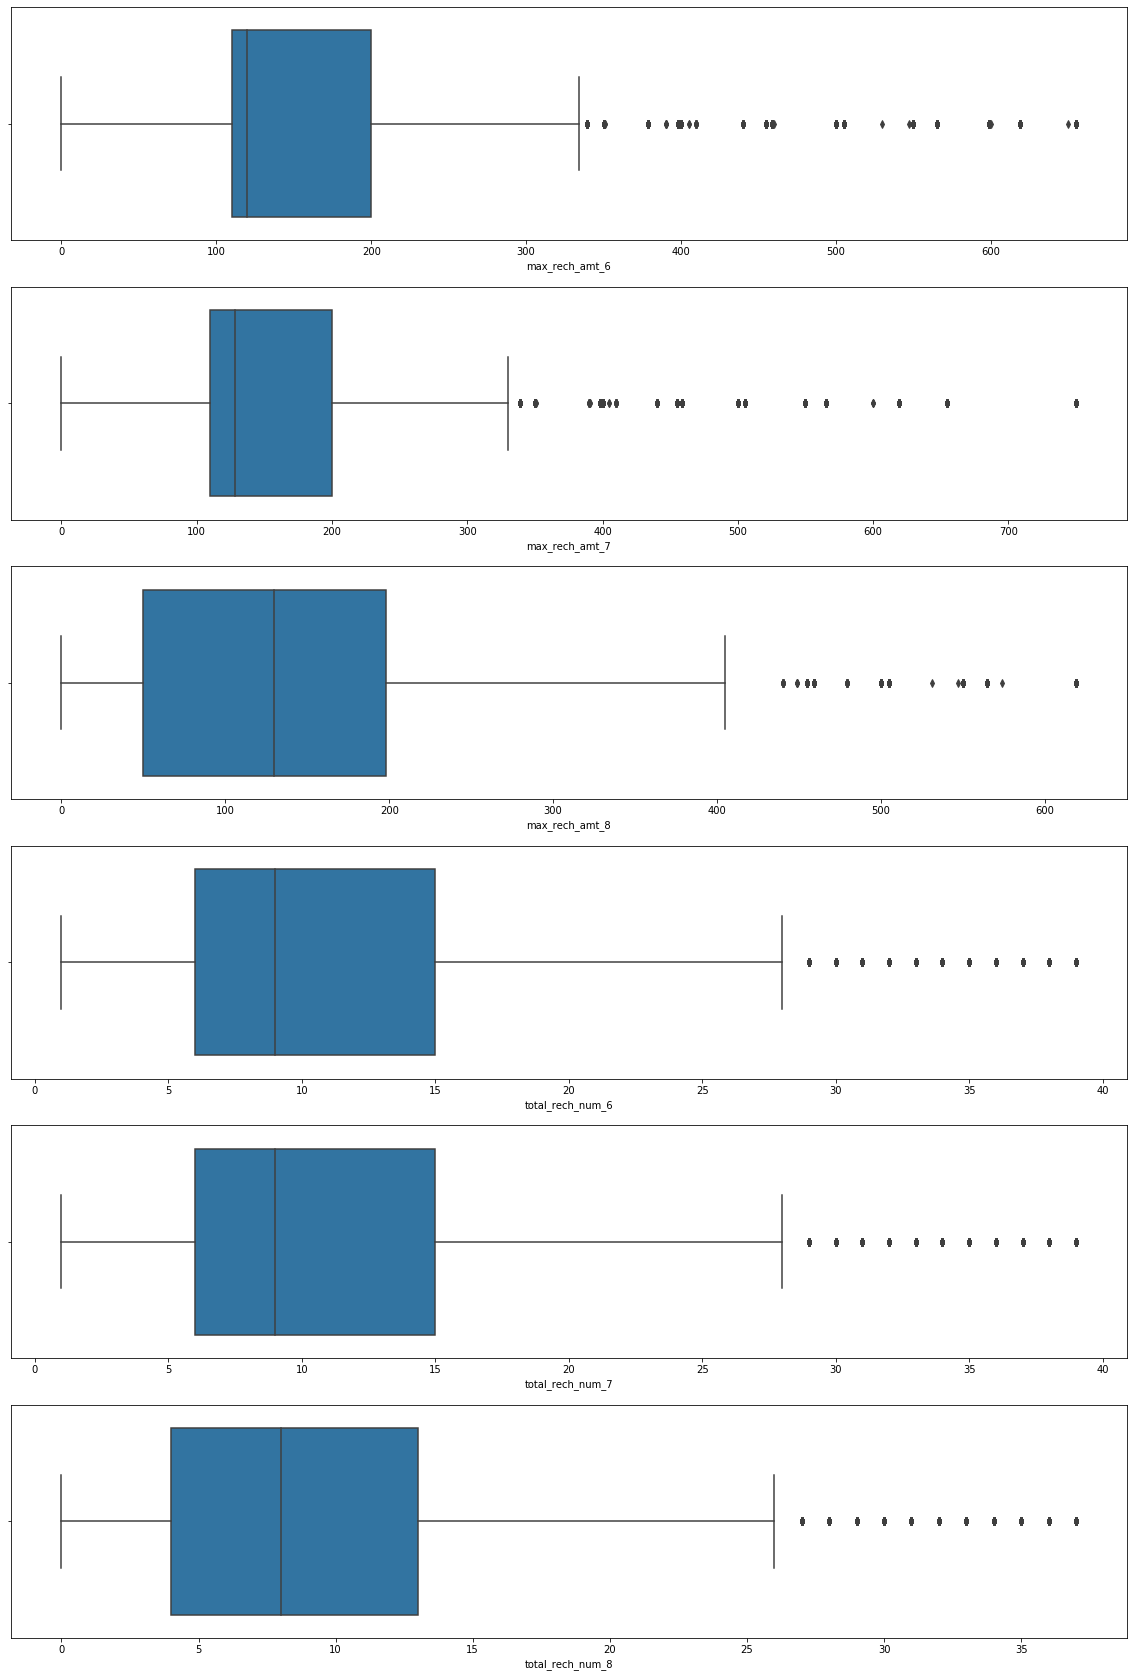

In [34]:
univarate_columns_list=['max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','total_rech_num_6','total_rech_num_7','total_rech_num_8']
univariate_analysis(univarate_columns_list)

In [35]:
telecom_hvc['total_sachet_2g']=telecom_hvc.sachet_2g_6+telecom_hvc.sachet_2g_7+telecom_hvc.sachet_2g_8
telecom_hvc['total_monthly_2g']=telecom_hvc.monthly_2g_6+telecom_hvc.monthly_2g_7+telecom_hvc.monthly_2g_8

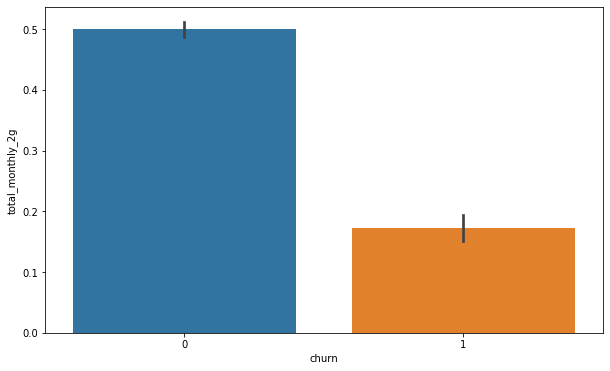

In [305]:
plt.figure(figsize=[10, 6])
sns.barplot(y=telecom_hvc['total_monthly_2g'],x=telecom_hvc['churn'])
plt.show()

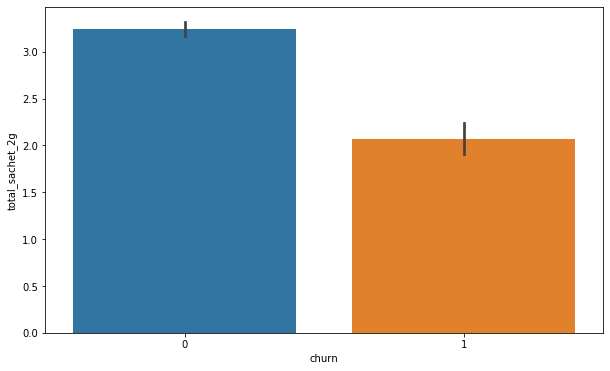

In [306]:
plt.figure(figsize=[10, 6])
sns.barplot(y=telecom_hvc['total_sachet_2g'],x=telecom_hvc['churn'])
plt.show()

In [38]:
#function for bivariate analysis
def bivariate_analysis(df,columns_list):
    plt.figure(figsize = (20,18))
    i = 1
    for col in columns_list:
        plt.subplot(len(columns_list)//2,2,i)
        sns.barplot(x='churn', y=col, data=df)
        i = i+1
    plt.show()

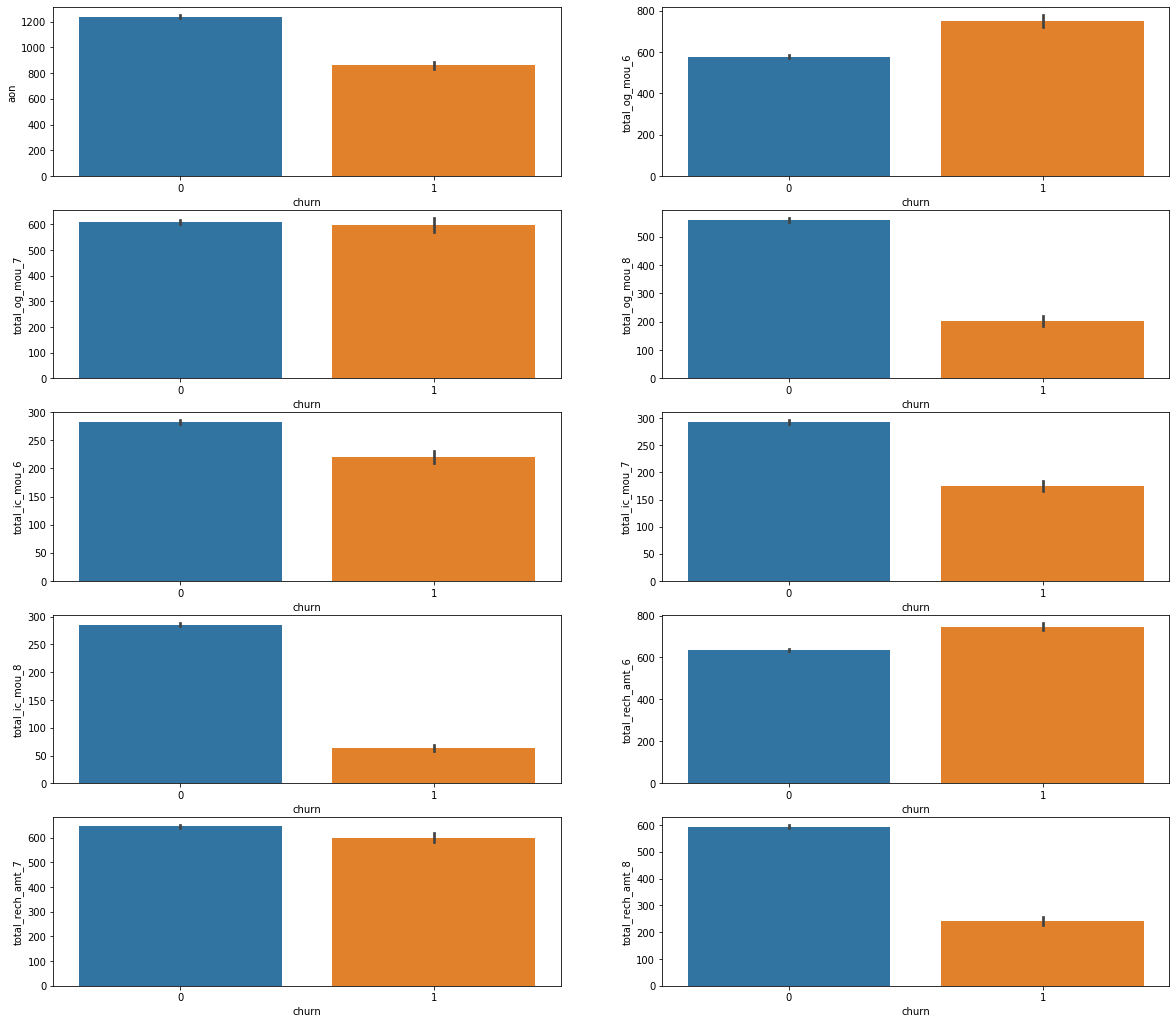

In [39]:
bivarate_columns_list=['aon','total_og_mou_6','total_og_mou_7','total_og_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']
bivariate_analysis(telecom_hvc,bivarate_columns_list)

In [40]:
#this function allows us to find average of attributes(month wise) and plot them against the respective months
def plot_byChurn(data,colList):
    # per month churn vs Non-Churn
    fig, ax = plt.subplots(figsize=(7,4))
    plt.plot(data.groupby('churn')[colList].mean().T)
    print(data.groupby('churn')[colList].mean().T)
    ax.set_xticklabels(['Jun','Jul','Aug'])
    plt.legend(['Non-Churn', 'Churn'])
    plt.show()

churn            0           1
arpu_6  536.301237  627.113179
arpu_7  548.458439  518.143051
arpu_8  516.909338  229.057406


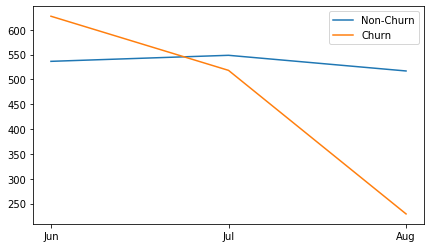

In [41]:
plot_byChurn(telecom_hvc,['arpu_6','arpu_7','arpu_8'])

churn               0         1
sachet_2g_6  1.013062  0.972552
sachet_2g_7  1.169811  0.832446
sachet_2g_8  1.056713  0.261368


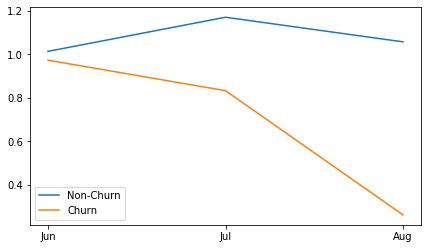

In [42]:
plot_byChurn(telecom_hvc,['sachet_2g_6','sachet_2g_7','sachet_2g_8'])

churn                0         1
monthly_2g_6  0.160087  0.079885
monthly_2g_7  0.191437  0.070873
monthly_2g_8  0.148549  0.021712


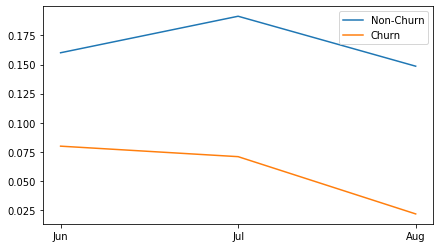

In [43]:
plot_byChurn(telecom_hvc,['monthly_2g_6','monthly_2g_7','monthly_2g_8'])

churn               0         1
sachet_3g_6  0.142199  0.148710
sachet_3g_7  0.168541  0.148300
sachet_3g_8  0.129427  0.039328


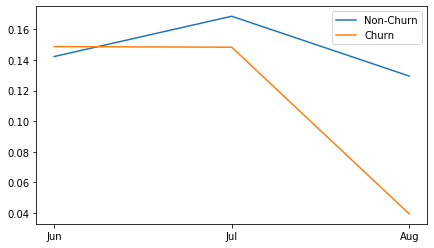

In [44]:
plot_byChurn(telecom_hvc,['sachet_3g_6','sachet_3g_7','sachet_3g_8'])

churn                0         1
monthly_3g_6  0.197569  0.181073
monthly_3g_7  0.209071  0.136829
monthly_3g_8  0.200544  0.054076


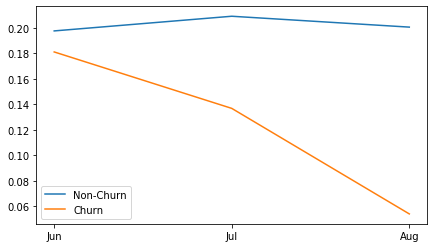

In [309]:
plot_byChurn(telecom_hvc,['monthly_3g_6','monthly_3g_7','monthly_3g_8'])

churn                        0           1
av_rech_amt_data_6  125.648877  103.896760
av_rech_amt_data_7  137.008504   83.925948
av_rech_amt_data_8  123.288608   29.158472


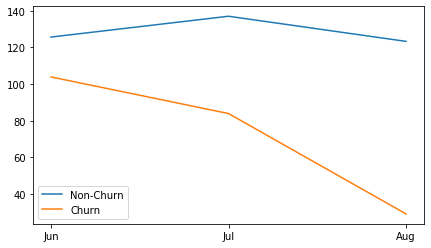

In [46]:
plot_byChurn(telecom_hvc,['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8'])

In [47]:
#correlation matrix 
corr = telecom_hvc.corr()
corr

mobile_number    arpu_6    arpu_7    arpu_8  \
mobile_number               1.000000  0.043757  0.040212  0.048592   
arpu_6                      0.043757  1.000000  0.586611  0.499734   
arpu_7                      0.040212  0.586611  1.000000  0.694627   
arpu_8                      0.048592  0.499734  0.694627  1.000000   
onnet_mou_6                 0.012509  0.434044  0.287351  0.205748   
onnet_mou_7                 0.008416  0.280951  0.429563  0.309315   
onnet_mou_8                 0.012584  0.247187  0.365886  0.459490   
offnet_mou_6                0.025980  0.605921  0.411836  0.320791   
offnet_mou_7                0.015682  0.402480  0.590519  0.446304   
offnet_mou_8                0.027328  0.360124  0.493530  0.632750   
roam_ic_mou_6               0.016420  0.155969  0.135192  0.133100   
roam_ic_mou_7               0.007759  0.130153  0.153431  0.114844   
roam_ic_mou_8               0.018084  0.137882  0.156537  0.156306   
roam_og_mou_6               0.008819  0.199834  0.157514  0.154428   
roam_og_mou_7               0.008567  0.158181  0.187022  0.126248   
roam_og_mou_8               0.009571  0.160521  0.189153  0.195548   
loc_og_t2t_mou_6            0.076460  0.292687  0.203999  0.196313   
loc_og_t2t_mou_7            0.074544  0.233099  0.290211  0.254199   
loc_og_t2t_mou_8            0.074478  0.217861  0.257559  0.344140   
loc_og_t2m_mou_6            0.095390  0.424863  0.291664  0.287502   
loc_og_t2m_mou_7            0.090586  0.326423  0.401617  0.360254   
loc_og_t2m_mou_8            0.092166  0.295289  0.342714  0.470635   
loc_og_t2f_mou_6            0.086039  0.208709  0.167620  0.189294   
loc_og_t2f_mou_7            0.082215  0.169467  0.206651  0.206970   
loc_og_t2f_mou_8            0.083877  0.158119  0.180754  0.250141   
loc_og_t2c_mou_6           -0.010465  0.075467  0.013841  0.005512   
loc_og_t2c_mou_7           -0.017578  0.003452  0.072500  0.032382   
loc_og_t2c_mou_8           -0.006491  0.015579  0.048594  0.105707   
loc_og_mou_6                0.099032  0.440971  0.304327  0.293257   
loc_og_mou_7                0.096273  0.344144  0.426891  0.376725   
loc_og_mou_8                0.095601  0.309686  0.362901  0.489730   
std_og_t2t_mou_6           -0.017580  0.329129  0.212464  0.130796   
std_og_t2t_mou_7           -0.019532  0.197050  0.331110  0.223492   
std_og_t2t_mou_8           -0.014342  0.168729  0.282330  0.351132   
std_og_t2m_mou_6           -0.031936  0.371713  0.249670  0.149849   
std_og_t2m_mou_7           -0.036302  0.226734  0.382681  0.254614   
std_og_t2m_mou_8           -0.029822  0.194002  0.318723  0.394935   
std_og_t2f_mou_6            0.038779  0.103926  0.081226  0.091774   
std_og_t2f_mou_7            0.039106  0.081598  0.105068  0.103485   
std_og_t2f_mou_8            0.038855  0.076474  0.093874  0.136227   
std_og_mou_6               -0.030319  0.471805  0.307560  0.184554   
std_og_mou_7               -0.035438  0.282884  0.481111  0.320891   
std_og_mou_8               -0.026784  0.235919  0.394074  0.490790   
isd_og_mou_6                0.009374  0.196029  0.132998  0.126057   
isd_og_mou_7                0.014900  0.120104  0.189882  0.144581   
isd_og_mou_8                0.012375  0.126471  0.151214  0.198601   
spl_og_mou_6               -0.024330  0.153027  0.057633  0.025950   
spl_og_mou_7               -0.027043  0.062610  0.151507  0.076051   
spl_og_mou_8               -0.018758  0.062494  0.121863  0.187046   
og_others_6                -0.013219  0.161025  0.065257  0.029626   
og_others_7                      NaN       NaN       NaN       NaN   
og_others_8                      NaN       NaN       NaN       NaN   
total_og_mou_6              0.024843  0.674259  0.445585  0.326983   
total_og_mou_7              0.015468  0.439474  0.668904  0.491507   
total_og_mou_8              0.025856  0.373565  0.544045  0.697765   
loc_ic_t2t_mou_6            0.064112  0.205489  0.134131  0.139768   
loc_ic_t2t_mou_7            0.061

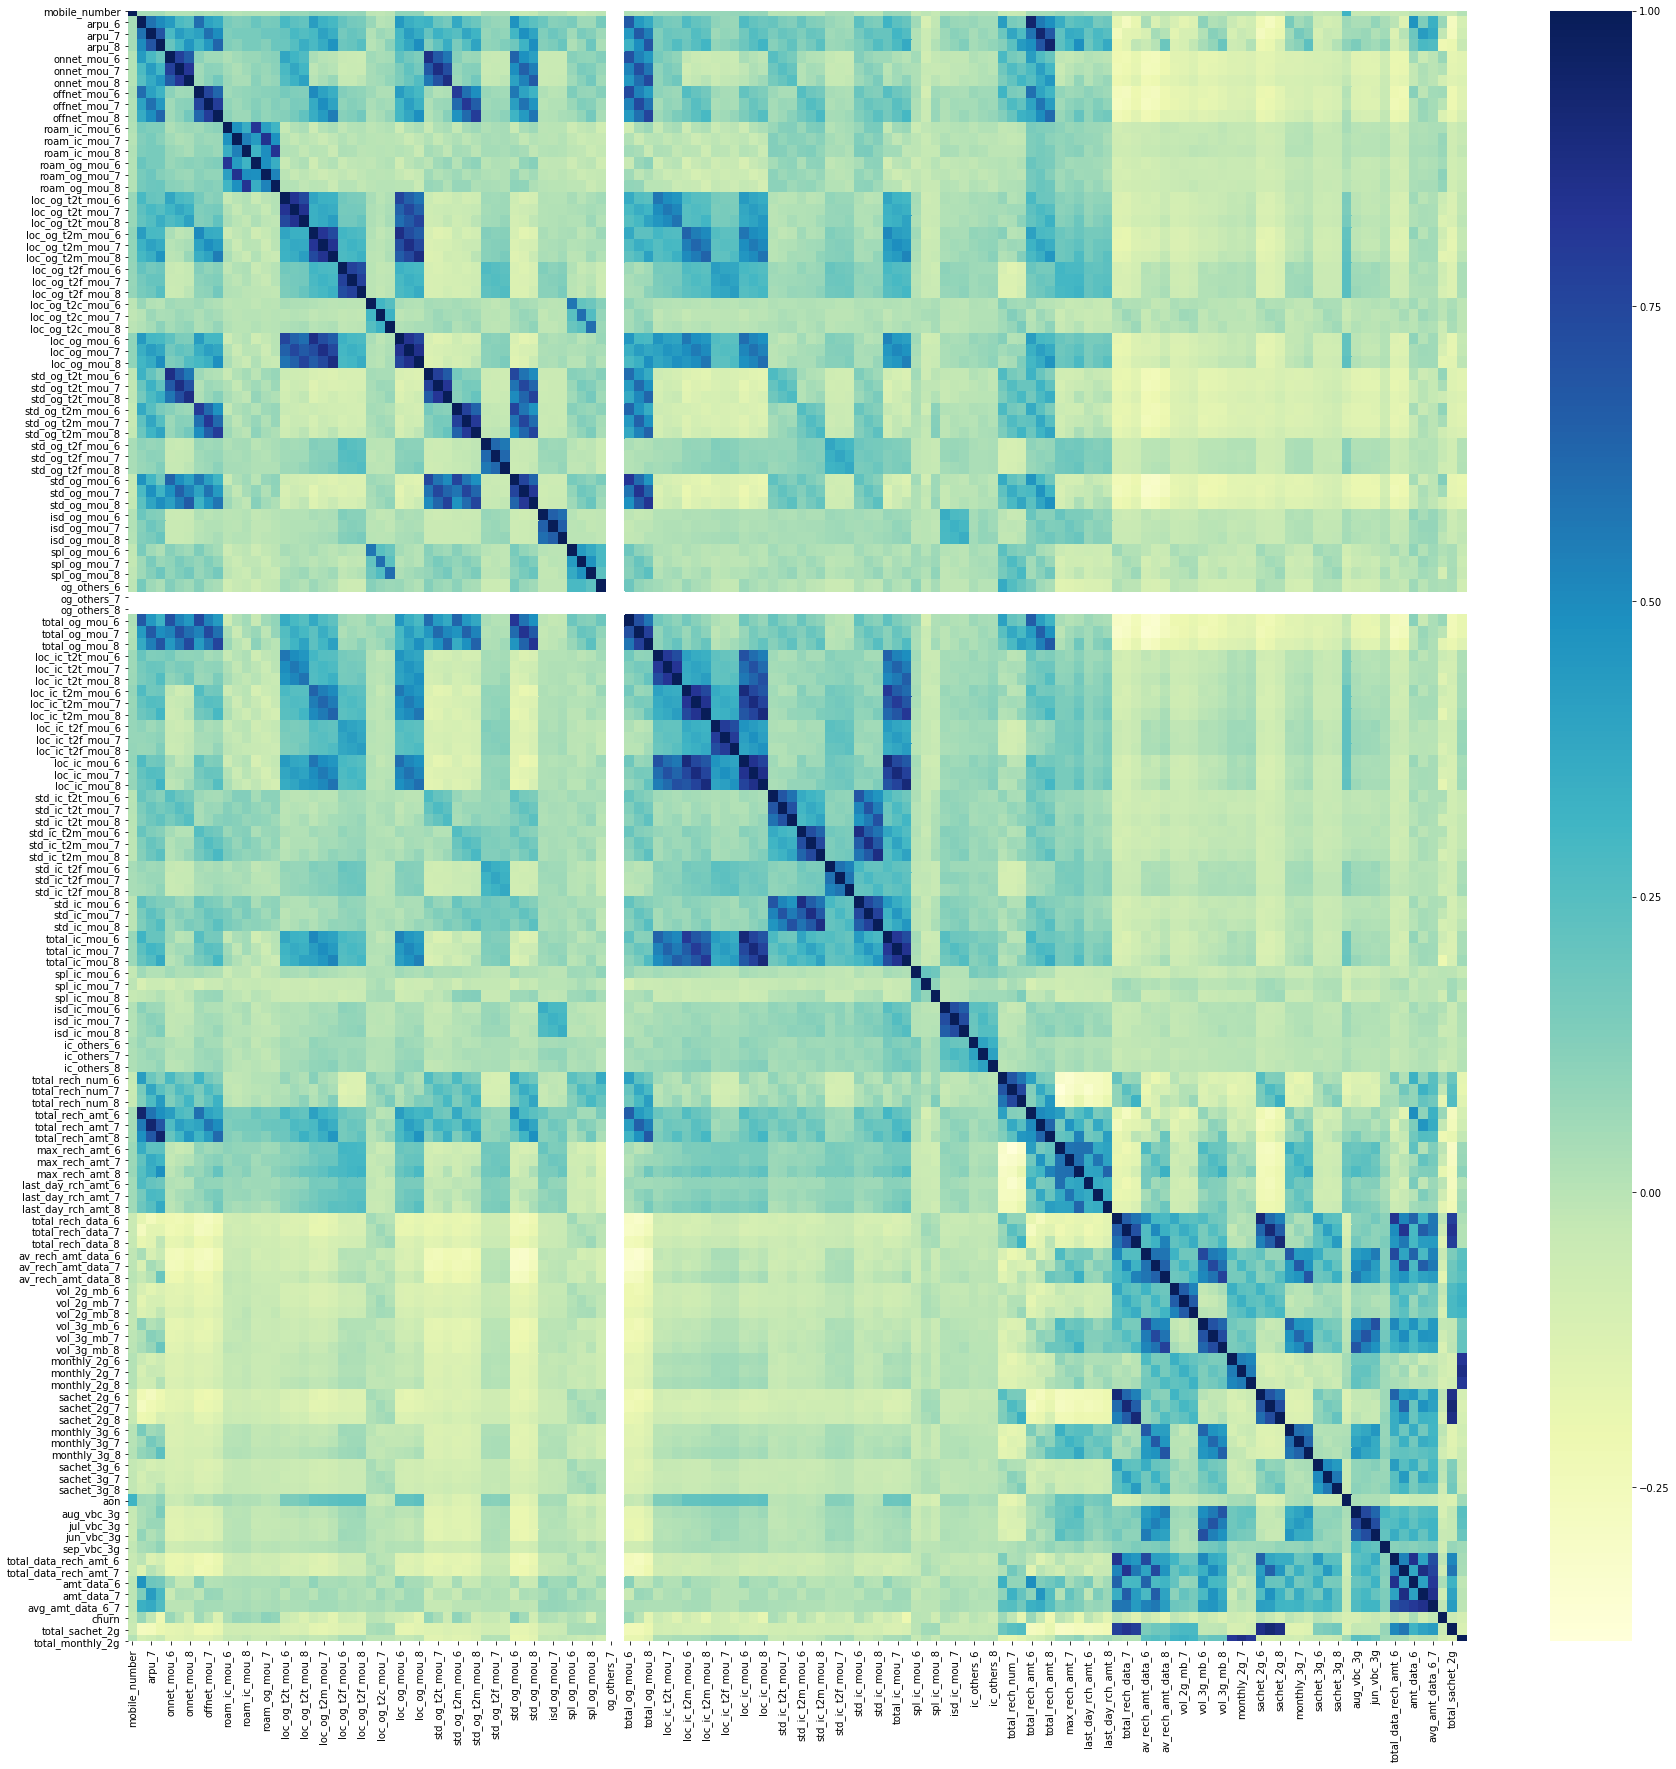

In [48]:
# plotting correlations on a heatmap
# heatmap
plt.figure(figsize=(30,30))

sns.heatmap(corr, cmap="YlGnBu")
plt.show()

In [49]:
#dropping mobile number as it signifies user 
telecom_hvc = telecom_hvc.drop('mobile_number',axis='columns')

In [50]:
telecom_hvc.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   197.385   214.816   213.803        34.31        32.33         0.00   
1  1069.180  1349.850  1659.130        57.84        54.68        52.29   
2   378.721   492.223   137.362       413.69       351.03        35.08   
3   514.453   597.753   637.760       102.41       132.11        85.14   
4    74.350   193.897   366.966        48.96        50.66        33.58   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         96.31        91.735          0.00           0.00           0.00   
1        453.43       567.160        325.91          16.23          33.49   
2         94.66        80.630        136.48           0.00           0.00   
3        757.93       896.680        983.39           0.00           0.00   
4         85.41        89.360        205.89           0.00           0.00   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00   
1          31.64          23.74          12.59          38.06   
2           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0             11.91             11.61              0.00             41.03   
1             51.39             31.38             40.28            308.63   
2            297.13            217.59             12.49             80.96   
3              4.48              6.16             23.34             91.81   
4             48.96             50.66             33.58             82.94   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             40.43              0.00              0.00              0.00   
1            447.38            162.28             58.59             55.14   
2             70.58             50.54              0.00              0.00   
3             87.93            104.81              0.75              0.00   
4             83.01            148.56              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0               0.0              0.00   
1             53.23               0.0               0.0              0.00   
2              0.00               0.0               0.0              7.15   
3              1.58               0.0               0.0              0.00   
4              0.00               0.0               0.0             17.71   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0         65.11        63.685          0.00              0.00   
1        422.16       533.910        255.79              4.30   
2        378.09       288.180         63.04            116.56   
3         97.04        94.090        129.74             97.93   
4        131.91       133.680        182.14              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              0.00              3.95             3.635   
1             23.29             12.01             49.89            31.760   
2            133.43             22.58             13.69            10.040   
3            125.94             61.79            665.36           808.740   
4              0.00              0.00              2.36             6.350   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1             49.14              6.66             20.08             16.68   
2             75.69              0.00              0.00              0.00   
3            876.99              0.00              0.00              0.00   
4             39.61              0.00              0.00              0.00   



### Model Building


In [136]:
import sklearn
from sklearn.model_selection import train_test_split

In [137]:
#splitting training and test data set
telecom_train, telecom_test = train_test_split(telecom_hvc, train_size=0.7, random_state=100)
print(telecom_train.shape)
print(telecom_test.shape)

(21000, 139)
(9001, 139)


In [139]:
#creating X_train and y_train
y_train = telecom_train.pop('churn')
X_train = telecom_train

In [142]:
#creating X_test and y_test
y_test = telecom_test.pop('churn')
X_test = telecom_test

In [310]:
print(len(y_train),len(X_train))
print(len(y_test),len(X_test))

21000 21000
9001 9001


In [144]:
#normalization (scaling) using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#we have all numeric columns in the dataset
numeric = list(X_train.columns)
#scaling the numeric values using Standard scaler method for train set
telecom_train[numeric] = scaler.fit_transform(telecom_train[numeric])
telecom_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
11785  1.601368  1.058597  0.268532    -0.642989    -0.625655    -0.597444   
11987 -0.090336 -0.688438 -0.355113    -0.269934    -0.519389    -0.497135   
11648 -0.725242 -0.680915 -0.493543    -0.472434    -0.449713    -0.378089   
12890  2.040743 -0.653223  0.576448     3.843319    -0.222787     1.339388   
3762  -0.313164 -0.262645 -0.627832    -0.610990    -0.529310    -0.544171   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
11785     -0.517084     -0.499233     -0.588130       0.443688       0.656924   
11987     -0.098553     -0.332473     -0.148772      -0.303014      -0.282400   
11648     -0.068532     -0.160537     -0.285476       0.154135       1.207271   
12890      0.269458     -0.397359      0.611618      -0.303014       1.118483   
3762      -0.430682     -0.151593     -0.631186      -0.303014      -0.282400   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
11785       0.814809      -0.217313      -0.000277      -0.082315   
11987      -0.282817      -0.312990      -0.297127      -0.295295   
11648       2.130832       0.045837       0.143194       1.361234   
12890       0.521968      -0.312990       0.394630       0.213609   
3762       -0.282817      -0.312990      -0.297127      -0.295295   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
11785         -0.541655         -0.527539         -0.540764         -0.677160   
11987         -0.058866         -0.337360         -0.220108          0.615517   
11648         -0.409659         -0.492931         -0.346779          0.275533   
12890         -0.247911         -0.320139          4.500595          0.584035   
3762          -0.472265         -0.352532         -0.476668          0.135658   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
11785         -0.639820         -0.663249         -0.349049         -0.453453   
11987          0.122422          0.354362          0.594268         -0.011760   
11648          0.321989         -0.092644         -0.181922          0.141724   
12890         -0.052634          1.132523         -0.326651          1.430138   
3762           0.610184         -0.354012         -0.114727          1.689356   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
11785         -0.442418         -0.367946          1.304772         -0.060251   
11987          2.682247         -0.367946          3.958504         -0.364716   
11648         -0.442418         -0.367946         -0.375137         -0.364716   
12890          1.272800         -0.367946         -0.375137          0.294035   
3762          -0.118553         -0.367946         -0.375137         -0.364716   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
11785     -0.711997     -0.691528     -0.700339         -0.470784   
11987      0.366167     -0.093202      0.216238         -0.220043   
11648     -0.028329     -0.019546     -0.248571         -0.335048   
12890      0.233577     -0.144488      2.748230          4.056262   
3762      -0.142688      0.289487     -0.459037         -0.459093   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
11785         -0.472880         -0.437485         -0.502060         -0.479125   
11987         -0.415856         -0.437485         -0.411900         -0.453319   
11648         -0.291711         -0.348204         -0.194774         -0.345944   
12890         -0.078684         -0.322991          0.005087         -0.511426   
3762          -0.431992         -0.398433         -0.510194         -0.511426   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
11785         -0.436515         -0.274316         -0.274241         -0.269314   
11987         -0.415901         -0.274316          1.624855         -0.269314   
11648         -0.348932         

In [145]:
#scaling the numeric values for test set
telecom_test[numeric] = scaler.transform(telecom_test[numeric])
telecom_test.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
6102  -0.013924 -0.029034 -0.581900    -0.615600    -0.632737    -0.588635   
2539  -1.371486 -0.990172 -1.133772    -0.615680    -0.622970    -0.584524   
21576  0.510658  0.508553  0.358232     0.273890    -0.065485     0.040206   
19574 -0.252263 -0.176910 -0.096181    -0.445367    -0.480601    -0.287596   
12804  0.179547 -0.422471 -1.089515     1.098068     0.333266    -0.478398   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
6102      -0.758558     -0.849546     -0.786872      -0.303014        -0.2824   
2539      -0.826883     -0.833798     -0.836229      -0.154498        -0.2824   
21576      1.133028      1.081075      1.439770      -0.303014        -0.2824   
19574     -0.029956     -0.223965     -0.261060      -0.303014        -0.2824   
12804     -0.515625     -0.582224     -0.831766      -0.303014        -0.2824   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
6102       -0.282817      -0.312990      -0.297127      -0.295295   
2539       -0.163563      -0.252275      -0.084914      -0.185997   
21576      -0.282817      -0.312990      -0.297127      -0.295295   
19574      -0.282817      -0.312990      -0.297127      -0.295295   
12804       0.928770      -0.312990      -0.297127       0.565046   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
6102          -0.557021         -0.561819         -0.512605         -0.559166   
2539          -0.521222         -0.580271         -0.558195         -0.780853   
21576          1.973230          0.748273          0.838135          3.008595   
19574         -0.038842         -0.233127          0.440958          0.401713   
12804         -0.514112         -0.535822         -0.584030         -0.287553   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
6102          -0.773735         -0.694136         -0.143156         -0.324697   
2539          -0.775526         -0.767956         -0.451565         -0.453453   
21576          2.772054          2.674303         -0.145740         -0.453453   
19574          0.071712          0.080788         -0.297360         -0.085944   
12804         -0.203537         -0.754794         -0.451565         -0.453453   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
6102          -0.289532         -0.359287         -0.375137         -0.364716   
2539          -0.442418          4.648679          2.239222          0.390910   
21576         -0.208113         -0.367946         -0.375137          2.414217   
19574         -0.442418         -0.367946         -0.052280         -0.364716   
12804         -0.442418          2.420350          2.777318         -0.364716   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
6102      -0.633078     -0.788836     -0.703730         -0.432158   
2539      -0.775596     -0.802704     -0.776135         -0.457659   
21576      2.727455      2.083082      2.046734         -0.362575   
19574      0.199990     -0.086690      0.173760         -0.431784   
12804     -0.449728     -0.407261     -0.777603          1.544929   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
6102          -0.466071         -0.437485         -0.495671         -0.484938   
2539          -0.450438         -0.430089         -0.510194         -0.510447   
21576         -0.282237         -0.195019         -0.366118         -0.187580   
19574         -0.408602         -0.434264         -0.161334         -0.238865   
12804          0.643122         -0.403692         -0.383571         -0.485650   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
6102          -0.462223         -0.017328         -0.274241          0.009592   
2539          -0.481846         -0.274316         -0.274241         -0.269314   
21576          0.202860         

### Applying PCA- 

In [146]:
from sklearn.decomposition import PCA

In [147]:
pca = PCA(random_state=42)

In [148]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [149]:
len(X_train)

21000

In [150]:
#principle components 
pca.components_

array([[ 1.44545101e-01,  1.53935032e-01,  1.50891999e-01, ...,
        -7.19855457e-03, -1.02291768e-01, -2.50840576e-02],
       [-1.78417814e-02, -2.71822605e-02, -1.41230169e-03, ...,
         9.26341767e-02,  3.57558233e-02,  7.84913921e-02],
       [ 1.11756314e-01,  1.50108184e-01,  1.47767973e-01, ...,
         2.63738527e-01,  1.12417934e-01, -2.28954365e-02],
       ...,
       [-0.00000000e+00, -2.67288330e-17, -6.25341671e-17, ...,
        -5.59554077e-16, -2.67873645e-02, -4.82088317e-01],
       [ 0.00000000e+00, -1.27684407e-16, -3.05332262e-17, ...,
        -3.26624864e-16,  5.15543243e-02,  6.61525988e-01],
       [ 0.00000000e+00,  7.12324733e-17, -1.78851213e-16, ...,
         2.55086066e-16,  1.80254018e-03, -2.75437886e-02]])

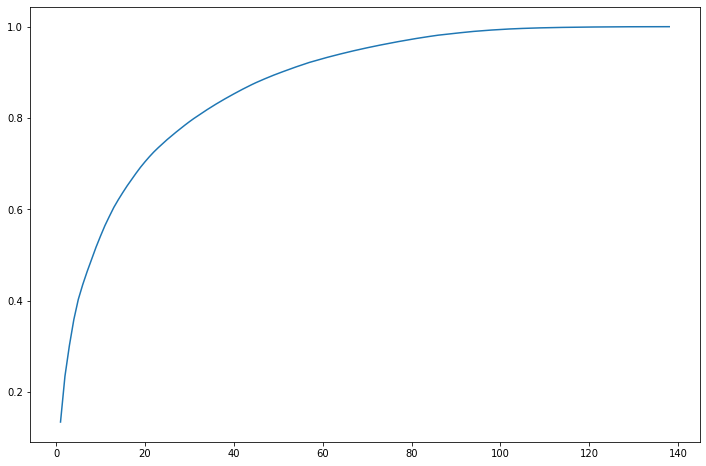

In [152]:
#making scree plots for the explained variance ratio
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize = (12,8))
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [153]:
#performing PCA with 80 components as it explains 95% of variance 
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=80)

In [154]:
telecom_train_pca = pca_final.fit_transform(X_train)

In [156]:
len(y_train)

21000

In [157]:
telecom_train_pca.shape

(21000, 80)

In [158]:
corrmat = np.corrcoef(telecom_train_pca.transpose())

In [159]:
corrmat.shape

(80, 80)

correlation of principle components


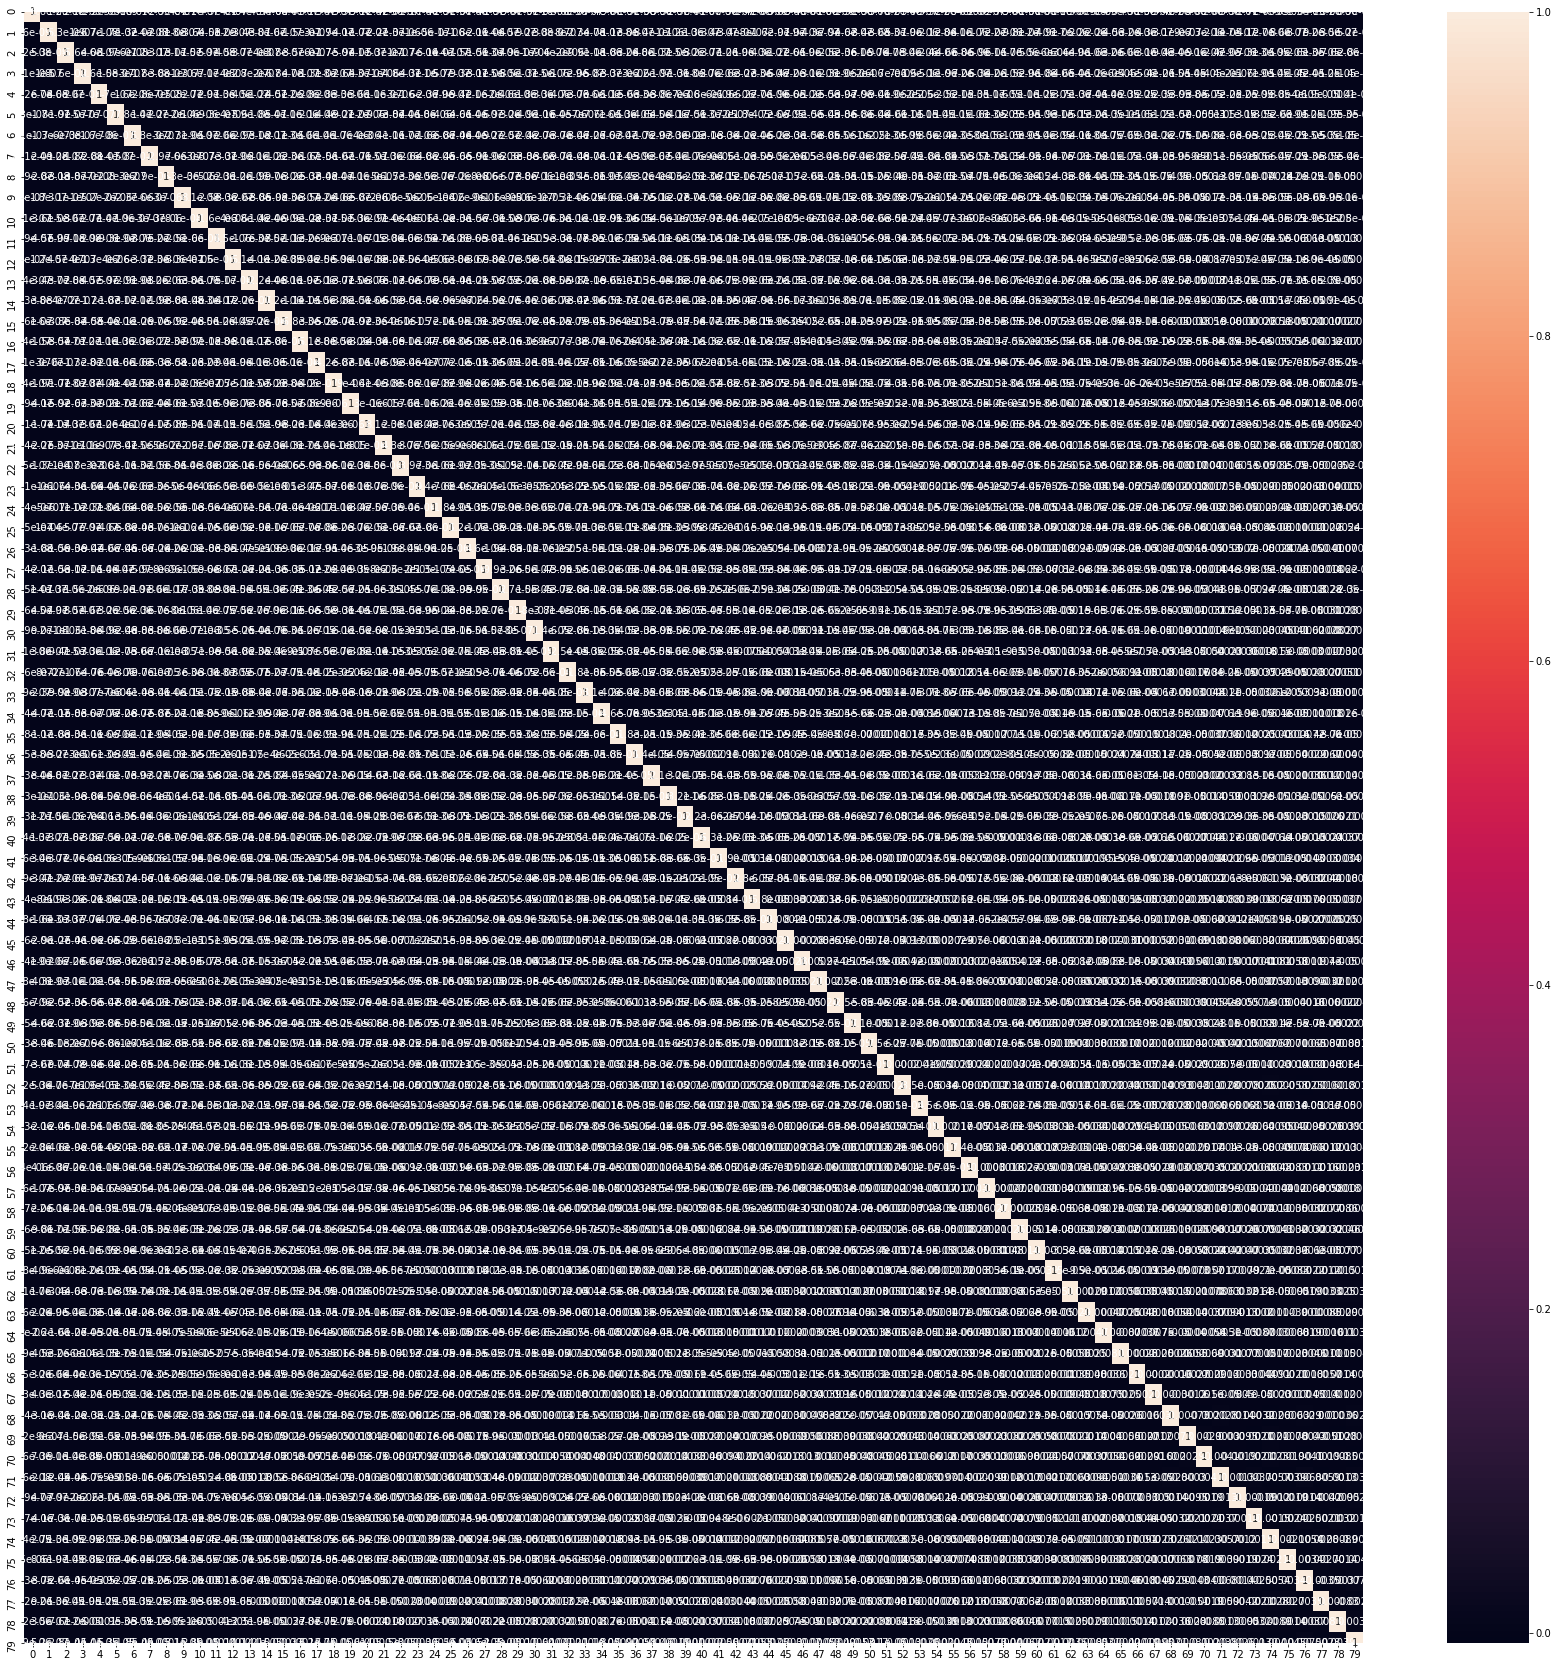

In [312]:
print("correlation of principle components")
plt.figure(figsize=[30,30])
sns.heatmap(corrmat, annot=True)


In [161]:
#applying PCA to test set
telecom_test_pca = pca_final.transform(X_test)
telecom_test_pca.shape

(9001, 80)

In [180]:
# function to calculate Sensitivity,Specificity,Accuracy
def model_metrics(confusion):
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity=',TP / float(TP+FN))
    print('Specificity=', TN / float(TN+FP))
    print('Accuracy =',float(TN+TP)/float(TN+TP+FN+FP))

In [163]:
# Function to draw ROC 
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

### Logistic Regression with PCA

In [344]:
#applying logistic regression on the data ( principle components) 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logistic_model = LogisticRegression(class_weight='balanced')

model_logistic_pca = logistic_model.fit(telecom_train_pca, y_train)

training_predictions = model_logistic_pca.predict(telecom_train_pca)
pred_probs_train = model_logistic_pca.predict_proba(telecom_train_pca)
#auc_score
metrics.roc_auc_score(y_train, pred_probs_train[:,1])

0.8991275719821794

In [345]:
#confusion matrix
confusion = metrics.confusion_matrix(y_train,training_predictions )
confusion

array([[15683,  3626],
       [  262,  1429]])

In [346]:
#getting metrics
model_metrics(confusion)

Sensitivity= 0.8450620934358368
Specificity= 0.8122119219017039
Accuracy = 0.8148571428571428


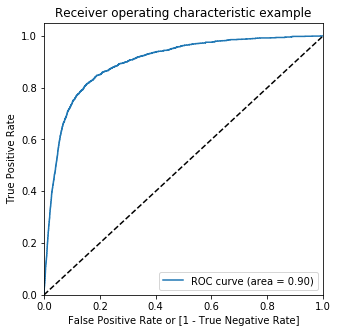

In [347]:
#ROC curve
draw_roc(y_train, pred_probs_train[:,1])

In [348]:
#creating a df with Churn and Churn_Prob
y_train_pred_final=pd.DataFrame()
y_train_pred_final['Churn']=y_train
y_train_pred_final['Churn_Prob']=pred_probs_train[:,1]
y_train_pred_final.head(10)

Churn  Churn_Prob
11785      0    0.781873
11987      0    0.122805
11648      0    0.305371
12890      0    0.003218
3762       0    0.117335
10072      0    0.081059
15584      0    0.051130
5067       0    0.022224
16450      0    0.153782
10103      0    0.536082

In [349]:
#adding probability columns where column value is 1 if churn_prob>probability otherwise 0
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
11785      0    0.781873    1    1    1    1    1    1    1    1    0    0
11987      0    0.122805    1    1    0    0    0    0    0    0    0    0
11648      0    0.305371    1    1    1    1    0    0    0    0    0    0
12890      0    0.003218    1    0    0    0    0    0    0    0    0    0
3762       0    0.117335    1    1    0    0    0    0    0    0    0    0

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.080524     1.000000     0.000000
0.1   0.1  0.442048     0.976937     0.395204
0.2   0.2  0.586905     0.945594     0.555492
0.3   0.3  0.682476     0.918983     0.661764
0.4   0.4  0.756238     0.883501     0.745093
0.5   0.5  0.814857     0.845062     0.812212
0.6   0.6  0.858333     0.790656     0.864260
0.7   0.7  0.892714     0.723241     0.907556
0.8   0.8  0.917762     0.576582     0.947641
0.9   0.9  0.925143     0.272620     0.982288


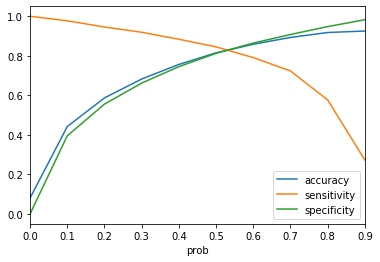

In [350]:
# caculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)
# plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

      prob  accuracy  sensitivity  specificity
0.50  0.50  0.814857     0.845062     0.812212
0.51  0.51  0.819429     0.838557     0.817753
0.52  0.52  0.824333     0.832052     0.823657
0.53  0.53  0.828762     0.828504     0.828785
0.54  0.54  0.833333     0.824364     0.834119
0.55  0.55  0.838000     0.819633     0.839608
0.56  0.56  0.842429     0.816085     0.844736
0.57  0.57  0.846714     0.810763     0.849863
0.58  0.58  0.850619     0.804849     0.854627
0.59  0.59  0.854238     0.794796     0.859444


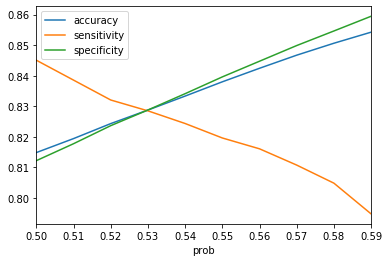

In [351]:
numbers = [0.4,0.45,0.5,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.6,0.65,0.7]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.5,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

#### Cut_off_logistic_regression=0.53

In [181]:
# Funtion to predict the churn using the input probability cut-off
def predictChurnWithProb(model,X,y,prob):
    pred_probs = model.predict_proba(X)[:,1]
    y_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Churn_Prob >0.53 else 0
    y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > prob else 0)
    confusion = metrics.confusion_matrix(y_df.churn,y_df.final_predicted)
    model_metrics(confusion)
    return y_df

In [329]:
#Applying cut off=0.53  for train
cut_off_prob=0.53
y_train_df = predictChurnWithProb(model_logistic_pca,telecom_train_pca,y_train,cut_off_prob)

Sensitivity= 0.8285038438793614
Specificity= 0.8287845046351442
Accuracy = 0.8287619047619048


In [338]:
#Applying cut off  for test
cut_off_prob=0.53
y_test_df = predictChurnWithProb(model_logistic_pca,telecom_test_pca,y_test,cut_off_prob)

Sensitivity= 0.8226666666666667
Specificity= 0.8394134044358259
Accuracy = 0.8380179980002223


churn  churn_Prob  final_predicted
6102       1    0.682731                1
2539       1    0.528634                0
21576      0    0.074101                0
19574      0    0.362147                0
12804      1    0.951232                1

### Model 2 -Random Forest with PCA

In [188]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [189]:
# fit using random forest with default parameters.
rfc.fit(telecom_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [190]:
# Making predictions using random forest with default parameters.
predictions = rfc.predict(telecom_test_pca)

Tuning hyper parameters

In [196]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 40, 5)}
# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                  return_train_score=True,
                   scoring="accuracy")
rf.fit(telecom_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [197]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.262436      0.022970         0.004498        0.000517   
1       0.759485      0.094918         0.007540        0.003740   
2       1.006295      0.057429         0.008562        0.001830   
3       0.947699      0.079132         0.007230        0.002117   
4       1.074691      0.179356         0.009166        0.003817   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.792906           0.730952   
1               7   {'max_depth': 7}           0.867174           0.854048   
2              12  {'max_depth': 12}           0.913592           0.900952   
3              17  {'max_depth': 17}           0.920733           0.911667   
4              22  {'max_depth': 22}           0.922637           0.917619   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.787619           0.757381           0.759467         0.765667   
1           0.860476           0.862381           0.867111         0.862238   
2           0.907143           0.912857           0.909979         0.908905   
3           0.915238           0.922619           0.916885         0.917429   
4           0.914762           0.925000           0.918314         0.919667   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.022522                8            0.797131            0.742381   
1        0.004865                7            0.886600            0.883036   
2        0.004585                6            0.955235            0.956726   
3        0.003903                5            0.974939            0.975714   
4        0.003670                4            0.982797            0.982619   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.781012            0.765298            0.754181   
1            0.881488            0.883393            0.889530   
2            0.959167            0.957262            0.956372   
3            0.975714            0.975060            0.977561   
4            0.981250            0.982202            0.983096   

   mean_train_score  std_train_score  
0          0.768001         0.019352  
1          0.884809         0.002887  
2          0.956952         0.001291  
3          0.975798         0.000939  
4          0.982393         0.000641

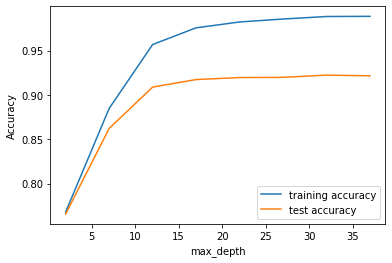

In [198]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
#maxdepth=18 

In [193]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'n_estimators': range(100,200, 10)}
# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=18,class_weight='balanced')
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                  return_train_score=True,
                   scoring="accuracy")
rf.fit(telecom_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=18,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                               

In [194]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       8.200987      0.224518         0.051430        0.011478   
1       8.859253      0.109557         0.053980        0.005714   
2       9.603725      0.074197         0.057318        0.005862   
3      10.220702      0.043076         0.058062        0.000542   
4      11.005740      0.038652         0.063109        0.000510   

  param_n_estimators                 params  split0_test_score  \
0                100  {'n_estimators': 100}           0.927636   
1                110  {'n_estimators': 110}           0.926446   
2                120  {'n_estimators': 120}           0.927874   
3                130  {'n_estimators': 130}           0.927398   
4                140  {'n_estimators': 140}           0.926208   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.916905           0.917619           0.923810           0.919743   
1           0.920476           0.917381           0.925476           0.919981   
2           0.917857           0.918095           0.924762           0.920695   
3           0.918571           0.917143           0.926667           0.920457   
4           0.918333           0.918333           0.923810           0.918790   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.921143        0.004040                8            0.987975   
1         0.921952        0.003452                4            0.987856   
2         0.921857        0.003903                6            0.989166   
3         0.922048        0.004210                3            0.987737   
4         0.921095        0.003289                9            0.989106   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.987738            0.987202            0.987440   
1            0.988095            0.986964            0.986786   
2            0.987917            0.987798            0.988095   
3            0.987083            0.988036            0.987143   
4            0.987798            0.987619            0.988750   

   split4_train_score  mean_train_score  std_train_score  
0            0.988751          0.987821         0.000533  
1            0.988453          0.987631         0.000648  
2            0.989167          0.988429         0.000610  
3            0.989465          0.987893         0.000864  
4            0.988215          0.988298         0.000561

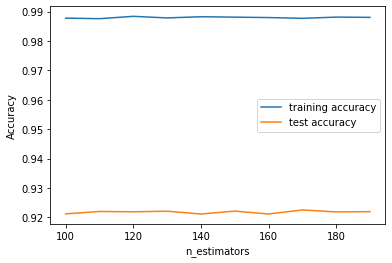

In [195]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
###n_estimators=100

In [221]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [5,10,20,30,40,50,54,57,60,70,80]}

# instantiate the model
rf = RandomForestClassifier(max_depth=18,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                  return_train_score=True,
                   scoring="accuracy")
rf.fit(telecom_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=18,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                               

In [222]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.655675      0.058723         0.006499        0.001282   
1       1.251032      0.114216         0.006641        0.000579   
2       2.369137      0.217499         0.006531        0.001205   
3       3.211632      0.204634         0.006044        0.000554   
4       4.481702      0.445844         0.006119        0.000839   

  param_max_features                params  split0_test_score  \
0                  5   {'max_features': 5}           0.921685   
1                 10  {'max_features': 10}           0.919543   
2                 20  {'max_features': 20}           0.921447   
3                 30  {'max_features': 30}           0.922161   
4                 40  {'max_features': 40}           0.916448   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.909524           0.915238           0.920476           0.918076   
1           0.913810           0.916429           0.921429           0.919743   
2           0.912143           0.916190           0.922143           0.917599   
3           0.913810           0.916190           0.923095           0.915218   
4           0.911429           0.915952           0.920000           0.917123   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.917000        0.004340                4            0.981249   
1         0.918190        0.002721                1            0.975772   
2         0.917905        0.003654                3            0.973629   
3         0.918095        0.003790                2            0.976665   
4         0.916190        0.002763                5            0.970832   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.978214            0.978036            0.978155   
1            0.975536            0.975893            0.974762   
2            0.971190            0.975357            0.972857   
3            0.969167            0.971488            0.969107   
4            0.970417            0.969464            0.967917   

   split4_train_score  mean_train_score  std_train_score  
0            0.981132          0.979357         0.001498  
1            0.977442          0.975881         0.000874  
2            0.976847          0.973976         0.001964  
3            0.972859          0.971857         0.002795  
4            0.972978          0.970321         0.001664

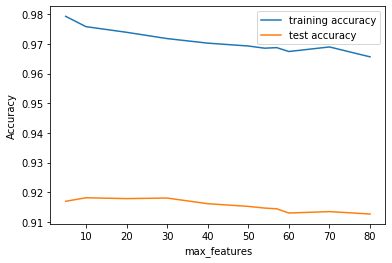

In [223]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
##max_features=30

In [218]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                  return_train_score=True,
                   scoring="accuracy")
rf.fit(telecom_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [219]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.729312      0.061005         0.007195        0.003320   
1       0.610387      0.043720         0.005706        0.001119   
2       0.557209      0.029249         0.004664        0.000312   
3       0.587761      0.069024         0.006659        0.002069   
4       0.580241      0.036532         0.005337        0.001037   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}           0.855749   
1                    150  {'min_samples_leaf': 150}           0.842657   
2                    200  {'min_samples_leaf': 200}           0.836468   
3                    250  {'min_samples_leaf': 250}           0.832183   
4                    300  {'min_samples_leaf': 300}           0.819805   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.841667           0.852143           0.854286           0.856156   
1           0.838333           0.853333           0.851905           0.844963   
2           0.835952           0.837619           0.829048           0.841629   
3           0.823333           0.828095           0.834762           0.828054   
4           0.817381           0.824286           0.818571           0.833294   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.852000        0.005354                1            0.863266   
1         0.846238        0.005646                2            0.855289   
2         0.836143        0.004068                3            0.841121   
3         0.829286        0.003918                4            0.834157   
4         0.822667        0.005804                5            0.824871   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.868274            0.866786            0.863452   
1            0.862083            0.860833            0.856071   
2            0.851607            0.848810            0.841845   
3            0.837262            0.833869            0.841964   
4            0.835714            0.834524            0.828810   

   split4_train_score  mean_train_score  std_train_score  
0            0.866913          0.865738         0.002012  
1            0.849057          0.856667         0.004623  
2            0.847390          0.846155         0.004055  
3            0.840188          0.837488         0.003212  
4            0.839414          0.832666         0.005175

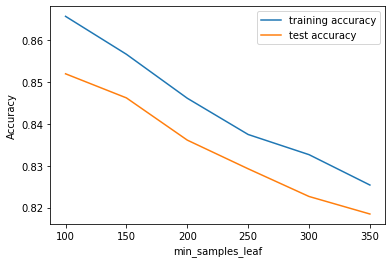

In [220]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
##min_samples_leaf=100

In [224]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                  return_train_score=True,
                   scoring="accuracy")
rf.fit(telecom_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [225]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.944440      0.108113         0.007563        0.000641   
1       0.735493      0.043307         0.005258        0.000493   
2       0.674519      0.012325         0.005495        0.000762   
3       0.644992      0.018194         0.004721        0.000360   
4       0.621184      0.010715         0.004600        0.000191   

  param_min_samples_split                      params  split0_test_score  \
0                     200  {'min_samples_split': 200}           0.879314   
1                     250  {'min_samples_split': 250}           0.865508   
2                     300  {'min_samples_split': 300}           0.855749   
3                     350  {'min_samples_split': 350}           0.861224   
4                     400  {'min_samples_split': 400}           0.851702   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.868810           0.866190           0.880476           0.874256   
1           0.862857           0.878810           0.871905           0.873065   
2           0.858095           0.866667           0.864048           0.863777   
3           0.845238           0.855714           0.864286           0.856633   
4           0.848810           0.854524           0.862381           0.855204   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.873810        0.005621                1            0.901185   
1         0.870429        0.005673                2            0.886958   
2         0.861667        0.004072                3            0.876600   
3         0.856619        0.006486                4            0.872969   
4         0.854524        0.004535                5            0.862313   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.903512            0.899345            0.900000   
1            0.894107            0.894583            0.889940   
2            0.880893            0.884464            0.871548   
3            0.872024            0.874167            0.871012   
4            0.873571            0.865595            0.867679   

   split4_train_score  mean_train_score  std_train_score  
0            0.905184          0.901845         0.002192  
1            0.893697          0.891857         0.002952  
2            0.879531          0.878607         0.004342  
3            0.869353          0.871905         0.001647  
4            0.870365          0.867905         0.003868

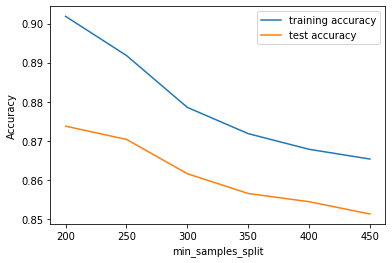

In [226]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
##min_samples_split=200

In [339]:
###### finding optimal parameters using parameter grid

In [228]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [15,16,18,19,20,21,22,23],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [50,100,200,300], 
    'max_features':[10,20,30,40,50,60]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [229]:
grid_search.fit(telecom_train_pca, y_train)

Fitting 3 folds for each of 768 candidates, totalling 2304 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 81.4min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 141.0min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed: 194.7min
[Parallel(n_jobs=-1)]: Done 2304 out of 2304 | elapsed: 251.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_sc...alse,
                                              random_state=None, verbose=0,
                               

In [230]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8721904761904762 using {'max_depth': 18, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [260]:
# model with the optimal hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=18,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=30,
                             n_estimators=80,
                            random_state=42,
                             class_weight='balanced')

In [270]:
# fit using random forest model with optimal hyperparameters
rfc.fit(telecom_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=18, max_features=30,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=200, min_weight_fraction_leaf=0.0,
                       n_estimators=80, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [271]:
# predict train set using random forest model with optimal hyperparameters
train_predictions_rf_pca = rfc.predict(telecom_train_pca)

In [262]:
# predict test set using random forest model with optimal hyperparameters
test_predictions_rf_pca = rfc.predict(telecom_test_pca)

In [263]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [273]:
#confusion matrix for train set using random forest model with optimal hyperparameters
confusion_matrix_rf_pca_train =confusion_matrix(y_train,train_predictions_rf_pca)

In [274]:
model_metrics(confusion_matrix_rf_pca_train)

Sensitivity= 0.8285038438793614
Specificity= 0.8736858459785593
Accuracy = 0.8700476190476191


In [275]:
#confusion matrix for test set using random forest model with optimal hyperparameters
confusion_matrix_rf_pca_test =confusion_matrix(y_test,test_predictions_rf_pca)

In [276]:
model_metrics(confusion_matrix_rf_pca_test)

Sensitivity= 0.7453333333333333
Specificity= 0.8722579081323476
Accuracy = 0.8616820353294078


#### Metrics Logistic Regression with PCA model 
                                    applying model on training set
                                    
                                    | Metric      | Value             |
                                    | ----------- | ----------------- |
                                    | Sensitivity | 0.8285038438793614|
                                    | Specificity | 0.8287845046351442|
                                    | Accuracy    | 0.8287619047619048|
                                    
                                    applying model on test data
                                    
                                    | Metric      | Value             |
                                    | ----------- | ----------------- |
                                    | Sensitivity | 0.8226666666666667|
                                    | Specificity | 0.8394134044358259|
                                    | Accuracy    | 0.8380179980002223|


#### Metrics Random Forest with PCA model 
                                    applying model on training set
                                    
                                    | Metric      | Value             |
                                    | ----------- | ----------------- |
                                    | Sensitivity | 0.8285038438793614|
                                    | Specificity | 0.8736858459785593|
                                    | Accuracy    | 0.8700476190476191|
                                    
                                    applying model on test data
                                    
                                    | Metric      | Value             |
                                    | ----------- | ----------------- |
                                    | Sensitivity | 0.7453333333333333|
                                    | Specificity | 0.8722579081323476|
                                    | Accuracy    | 0.8616820353294078|

Among the models that we have built ,we conclude that random forest model with PCA be will better fit for churn prediction with these parameters 'max_depth': 18, 'max_features': 30, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 80} giving the accuracy of 0.86.


Tuning random forest model to find important features without using PCA

In [340]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(30, 138, 10 )}
# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                  return_train_score=True,
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [279]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.709704      0.038847         0.009060        0.001994   
1       0.821292      0.068562         0.011719        0.002478   
2       0.847796      0.065976         0.010169        0.002033   
3       0.785320      0.042830         0.011126        0.003051   
4       0.822589      0.087577         0.012598        0.003486   

  param_max_depth             params  split0_test_score  split1_test_score  \
0              30  {'max_depth': 30}           0.942633           0.935714   
1              40  {'max_depth': 40}           0.941204           0.936905   
2              50  {'max_depth': 50}           0.940014           0.933333   
3              60  {'max_depth': 60}           0.942157           0.935238   
4              70  {'max_depth': 70}           0.941443           0.934286   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.936905           0.945000           0.940700         0.940190   
1           0.938810           0.947381           0.941653         0.941190   
2           0.937619           0.944048           0.941415         0.939286   
3           0.941190           0.945714           0.939748         0.940810   
4           0.935238           0.949048           0.939986         0.940000   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.003470                6            0.991666            0.991548   
1        0.003538                1            0.991369            0.991429   
2        0.003632               11            0.991785            0.993036   
3        0.003411                2            0.992857            0.991250   
4        0.005278                9            0.991309            0.992976   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.991369            0.992202            0.990179   
1            0.991786            0.992440            0.993453   
2            0.992262            0.992440            0.992084   
3            0.991964            0.990476            0.991429   
4            0.992143            0.990595            0.992381   

   mean_train_score  std_train_score  
0          0.991393         0.000667  
1          0.992095         0.000779  
2          0.992321         0.000418  
3          0.991595         0.000791  
4          0.991881         0.000837

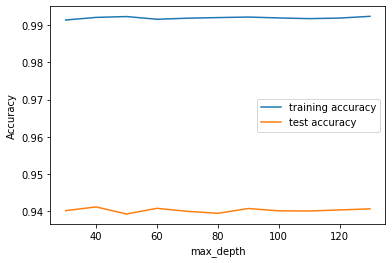

In [280]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
##max_depth=40

In [282]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': range(10,138,10)}

# instantiate the model
rf = RandomForestClassifier(max_depth=18,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                  return_train_score=True,
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=18,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                               

In [283]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.752266      0.070877         0.010326        0.002186   
1       1.163218      0.073208         0.008019        0.001077   
2       2.007475      0.270535         0.009129        0.001162   
3       2.688290      0.214547         0.007573        0.000636   
4       3.273316      0.293813         0.008704        0.001083   

  param_max_features                params  split0_test_score  \
0                 10  {'max_features': 10}           0.943585   
1                 20  {'max_features': 20}           0.942633   
2                 30  {'max_features': 30}           0.942871   
3                 40  {'max_features': 40}           0.944061   
4                 50  {'max_features': 50}           0.943109   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.933810           0.940476           0.946190           0.940224   
1           0.935476           0.938333           0.950714           0.940700   
2           0.932143           0.941905           0.945476           0.941415   
3           0.931190           0.938095           0.944048           0.941415   
4           0.931429           0.939286           0.948095           0.940700   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.940857        0.004150                3            0.984642   
1         0.941571        0.005160                1            0.983809   
2         0.940762        0.004532                4            0.982023   
3         0.939762        0.004813               11            0.978451   
4         0.940524        0.005446                7            0.980475   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.984048            0.982619            0.984167   
1            0.983333            0.982024            0.982024   
2            0.982024            0.980357            0.979167   
3            0.984226            0.979940            0.979524   
4            0.983750            0.978393            0.979107   

   split4_train_score  mean_train_score  std_train_score  
0            0.984168          0.983929         0.000686  
1            0.983572          0.982952         0.000773  
2            0.981906          0.981095         0.001153  
3            0.982561          0.980940         0.002127  
4            0.981192          0.980583         0.001865

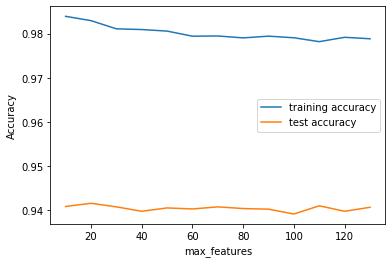

In [284]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [285]:
##max_features=20

In [286]:
# model with the optimal hyperparameters for feature selection
from sklearn.ensemble import RandomForestClassifier
rfc_feature_selection = RandomForestClassifier(bootstrap=True,
                             max_depth=40,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=20,
                             n_estimators=100,
                            random_state=42,
                             class_weight='balanced')

In [287]:
# fit 
rfc_feature_selection.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=40, max_features=20,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=200, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [289]:
# predict
train_predictions_rfc = rfc_feature_selection.predict(X_train)

In [292]:
# predict 
test_predictions_rfc = rfc_feature_selection.predict(X_test)

In [293]:
#confusion matrix for train set using random forest model with optimal hyperparameters
confusion_matrix_rfc_train =confusion_matrix(y_train,train_predictions_rfc)
model_metrics(confusion_matrix_rfc_train)

Sensitivity= 0.8391484328799527
Specificity= 0.9054844890983479
Accuracy = 0.9001428571428571


In [295]:
#confusion matrix for test set using random forest model with optimal hyperparameters
confusion_matrix_rfc_test =confusion_matrix(y_test,test_predictions_rfc)
model_metrics(confusion_matrix_rfc_test)

Sensitivity= 0.8026666666666666
Specificity= 0.9103139013452914
Accuracy = 0.9013442950783246


In [296]:
#how important the which features are 
rfc_feature_selection.feature_importances_

array([1.49251755e-03, 6.79305207e-03, 3.47261095e-02, 1.66797798e-03,
       2.33831148e-03, 4.33314603e-03, 1.26126749e-03, 3.23594906e-03,
       6.60730016e-03, 3.56000300e-04, 2.13755815e-03, 2.96355010e-02,
       3.30281455e-04, 2.08507090e-03, 4.82523123e-02, 1.21014952e-03,
       1.50436807e-03, 1.88801474e-02, 1.64785289e-03, 1.10474774e-03,
       3.28837179e-02, 5.67047843e-04, 7.97751487e-04, 9.89100055e-03,
       1.54877265e-04, 4.05228309e-04, 2.42785997e-04, 1.56182959e-03,
       4.15927882e-03, 2.17400833e-02, 1.62321883e-03, 1.47648318e-03,
       1.93147280e-03, 1.42128463e-03, 2.17505058e-03, 3.47547938e-03,
       6.38343734e-05, 1.99331715e-05, 9.11779581e-05, 3.01589054e-03,
       4.72233672e-03, 6.45241054e-03, 4.41631180e-05, 3.48493955e-04,
       2.06883650e-04, 8.07034934e-04, 1.74329550e-03, 2.34302425e-03,
       1.05768575e-04, 0.00000000e+00, 0.00000000e+00, 3.34560600e-03,
       4.66384517e-03, 7.58870467e-02, 1.14250500e-03, 1.84118770e-03,
      

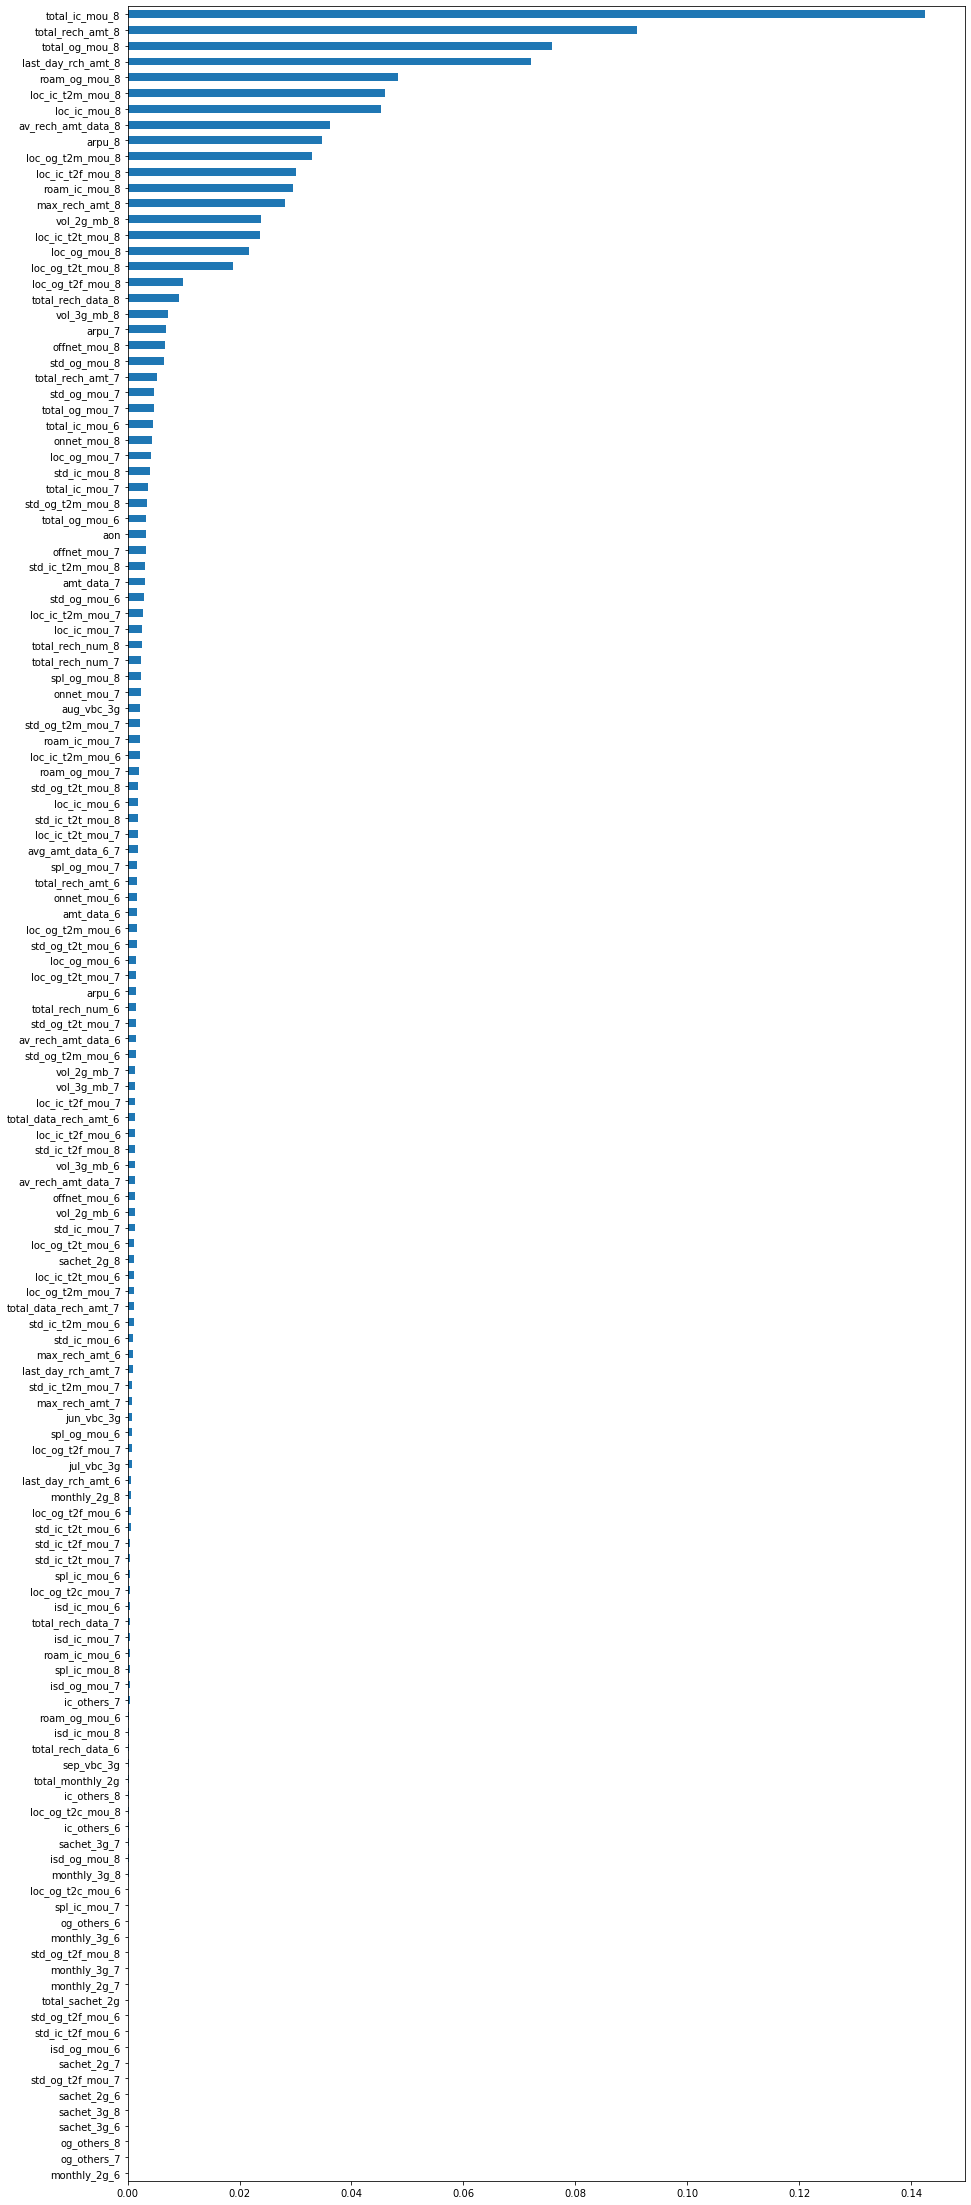

In [298]:
plt.figure(figsize=(15,40))
feat_importances = pd.Series(rfc_feature_selection.feature_importances_, index=X_train.columns)
feat_importances.nlargest(len(X_train.columns)).sort_values().plot(kind='barh', align='center')

In [303]:
#finding the most important features
feat_importances.nlargest(15, keep='all')

total_ic_mou_8        0.142432
total_rech_amt_8      0.090988
total_og_mou_8        0.075887
last_day_rch_amt_8    0.072056
roam_og_mou_8         0.048252
loc_ic_t2m_mou_8      0.046005
loc_ic_mou_8          0.045310
av_rech_amt_data_8    0.036231
arpu_8                0.034726
loc_og_t2m_mou_8      0.032884
loc_ic_t2f_mou_8      0.030159
roam_ic_mou_8         0.029636
max_rech_amt_8        0.028207
vol_2g_mb_8           0.023785
loc_ic_t2t_mou_8      0.023630
dtype: float64

#### Analysis and Recomendations
Total Mou's be it incoming or outgoing have a very important role for churn predictions. Reduction in these values in action phase(8th month) clear indicator of churn.

Also special attention needs to paid at amount of recharge done for 8th month(action phase) and most likely people who choose to churn will not recharge for the coming month.

Local Incoming and Outgoing Calls for 8th Month and avg revenue in 8th Month are the most important columns to predict churn.

The usage of mobile data has also reduced when compared with 7th month. So, data usage & amount can also be the other features for understanding the churn behavior

Next, we will look at some of the stratergic steps which can be taken to retain these predicted churners.
Strategies to manage customer churn

Customer churn seems to be well predicted by drop in usage. Based on the usage / last recharge, give better offers to the customers according to the services they used (outgoing/incoming )in previous months.

Telecom company needs to pay attention to the roaming rates. They need to provide good offers/reasonable rates to the customers who are using services from a roaming zone (longer timeframe/shorter timeframe).